In [6]:
# We can start by looking at the 'nicely' formatted data for analysis

df = pd.read_csv('../chr_measures_CSV_2018.csv')
df.head(5)

FileNotFoundError: ignored

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import qqplot

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


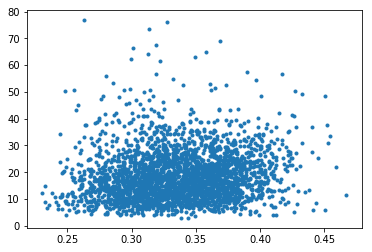

In [0]:
# What's the connection between insufficient sleep (143) and motor vehicle mortality rates (39)?

plt.plot(df.measure_143_value,df.measure_39_value,'.')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


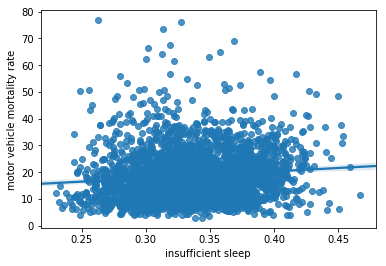

In [0]:
# There are many, many ways to get a best fit line, but Seaborn is a Python package that makes this easy:

fig = sns.regplot(x='measure_143_value',y='measure_39_value',data=df)
fig.set_xlabel('insufficient sleep')
fig.set_ylabel('motor vehicle mortality rate')
plt.savefig('sleep_vs_MVmortality.png',dpi=300)

# An alternative reader

The column headings make working with this a little unpleasant, so I've written a reader that simplifies things.  Run this bit of code as usual.  It doesn't produce output, but rather defines a function that processes some data.

In [0]:
def read_chr_data(fn,sheet_name='Ranked Measure Data'):
    df = pd.read_excel(fn,sheet_name=sheet_name)

    year = os.path.basename(fn)[:4]
    
    # Fix bad column headings
    top_row_values = df.columns.values
    for idx,item in enumerate(top_row_values.copy()):
        if item.startswith('Unnamed'):
            top_row_values[idx] = top_row_values[idx-1]       
    df = pd.read_excel(fn,sheet_name=sheet_name,skiprows=1)
    middle_row_values = df.columns.values
    column_names = list(middle_row_values[:3])
    for i in range(len(top_row_values)):
        column_names.append(top_row_values[i] + ' - ' + middle_row_values[i+3].split('.')[0] + ' - ' + year )
        
    df = pd.read_excel(fn,sheet_name=sheet_name,skiprows=1,names=column_names,dtype={'FIPS':np.str})
    df = df.set_index('FIPS')
    
    try:
        if np.isnan(df.iloc[-1].State):
            df = df.iloc[:-1]
    except:
        _ = True
    return df

In [0]:
df.iloc[-1]

State                                                                      Wyoming
County                                                                      Weston
Premature death - Years of Potential Life Lost Rate - 2018                 6921.61
Premature death - 95% CI - Low - 2018                                       5536.4
Premature death - 95% CI - High - 2018                                     8548.14
Premature death - Quartile - 2018                                                2
Premature death - Years of Potential Life Lost Rate (Black) - 2018             NaN
Premature death - Years of Potential Life Lost Rate (Hispanic) - 2018          NaN
Premature death - Years of Potential Life Lost Rate (White) - 2018             NaN
Poor or fair health - % Fair/Poor - 2018                                   13.2375
Poor or fair health - 95% CI - Low - 2018                                  12.6647
Poor or fair health - 95% CI - High - 2018                                 13.7956
Poor

In [0]:
# Load the data, and inspect the output

df = read_chr_data('2018 County Health Rankings Data - v2.xls',sheet_name='Additional Measure Data')
df.head()

,State,County,Premature age-adjusted mortality - # Deaths - 2018,Premature age-adjusted mortality - Age-Adjusted Mortality - 2018,Premature age-adjusted mortality - 95% CI - Low - 2018,Premature age-adjusted mortality - 95% CI - High - 2018,Premature age-adjusted mortality - Age-Adjusted Mortality (Black) - 2018,Premature age-adjusted mortality - Age-Adjusted Mortality (Hispanic) - 2018,Premature age-adjusted mortality - Age-Adjusted Mortality (White) - 2018,Child mortality - # Deaths - 2018,...,Demographics - % Hispanic - 2018,Demographics - # Non-Hispanic White - 2018,Demographics - % Non-Hispanic White - 2018,Demographics - # Not Proficient in English - 2018,Demographics - % Not Proficient in English - 2018,Demographics - 95% CI - Low - 2018,Demographics - 95% CI - High - 2018,Demographics - % Female - 2018,Demographics - # Rural - 2018,Demographics - % Rural - 2018
FIPS,,,,,,,,,,,,,,,,,,,,,
01001,Alabama,Autauga,827.0,449.6,418.5,480.7,531.7,NaN,444.9,31.0,...,2.688754,41562,75.000000,432,0.832739,0.457689,1.207789,51.288437,22921.0,42.002162
01003,Alabama,Baldwin,2753.0,351.3,337.5,365.1,517.8,111.1,349.3,85.0,...,4.416411,173529,83.202198,1540,0.818809,0.508623,1.128996,51.457833,77060.0,42.279099
01005,Alabama,Barbour,418.0,433.6,390.5,476.6,477.0,NaN,394.7,15.0,...,4.213364,12061,46.450992,382,1.519370,0.790980,2.247760,46.932409,18613.0,67.789635
01007,Alabama,Bibb,408.0,529.1,476.7,581.4,630.4,NaN,526.6,22.0,...,2.499669,16850,74.415934,96,0.448137,0.000000,1.041411,46.363114,15663.0,68.352607
01009,Alabama,Blount,996.0,480.2,449.2,511.2,NaN,NaN,NaN,30.0,...,9.068695,50472,87.467073,1018,1.878506,1.332987,2.424025,50.613476,51562.0,89.951502


In [0]:
# Print all the column names for future use below

print(df.columns.values)

['State' 'County' 'Premature age-adjusted mortality - # Deaths - 2018'
 'Premature age-adjusted mortality - Age-Adjusted Mortality - 2018'
 'Premature age-adjusted mortality - 95% CI - Low - 2018'
 'Premature age-adjusted mortality - 95% CI - High - 2018'
 'Premature age-adjusted mortality - Age-Adjusted Mortality (Black) - 2018'
 'Premature age-adjusted mortality - Age-Adjusted Mortality (Hispanic) - 2018'
 'Premature age-adjusted mortality - Age-Adjusted Mortality (White) - 2018'
 'Child mortality - # Deaths - 2018'
 'Child mortality - Child Mortality Rate - 2018'
 'Child mortality - 95% CI - Low - 2018'
 'Child mortality - 95% CI - High - 2018'
 'Child mortality - Child Mortality Rate (Black) - 2018'
 'Child mortality - Child Mortality Rate (Hispanic) - 2018'
 'Child mortality - Child Mortality Rate (White) - 2018'
 'Infant mortality - # Deaths - 2018'
 'Infant mortality - Infant Mortality Rate - 2018'
 'Infant mortality - 95% CI - Low - 2018'
 'Infant mortality - 95% CI - High - 20

# Regression

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     32.69
Date:                Mon, 18 Mar 2019   Prob (F-statistic):           1.20e-08
Time:                        16:00:59   Log-Likelihood:                -9829.6
No. Observations:                2691   AIC:                         1.966e+04
Df Residuals:                    2689   BIC:                         1.967e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.0024      1.546      6.470      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


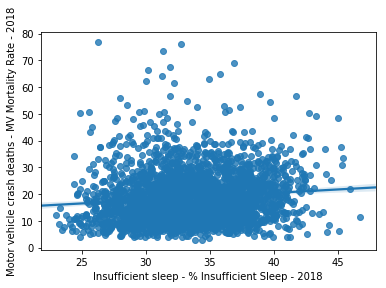

In [0]:
# Now that we have our data loaded and looking nice, let's run some regressions:
x = 'Insufficient sleep - % Insufficient Sleep - 2018'
y = 'Motor vehicle crash deaths - MV Mortality Rate - 2018'

# Run regression (You don't need to copy into a new data frame!)
ols = pd.DataFrame()
ols['x'] = df[x].values
ols['y'] = df[y].values
results = smf.ols('y ~ x', data=ols).fit()
print(results.summary())

# Make figure
fig = sns.regplot(x=x, y=y, data=df);
fig.set_xlabel(x)
fig.set_ylabel(y)
fig.figure.savefig('regression_result.png',dpi=300)

In [0]:
# The syntax for adding additional variables is pretty straightforward:

x1 = 'Insufficient sleep - % Insufficient Sleep - 2018'
x2 = 'Median household income - Household Income - 2018'
y = 'Motor vehicle crash deaths - MV Mortality Rate - 2018'

# Run regression
ols = pd.DataFrame()
ols['x1'] = df[x1].values
ols['x2'] = df[x2].values
ols['y'] = df[y].values
results = smf.ols('y ~ x1 + x2', data=ols).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     473.5
Date:                Mon, 18 Mar 2019   Prob (F-statistic):          6.78e-177
Time:                        16:01:02   Log-Likelihood:                -9439.7
No. Observations:                2691   AIC:                         1.889e+04
Df Residuals:                    2688   BIC:                         1.890e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.4748      1.762     25.240      0.0

# Joining the two dataframes and running analysis

In [0]:
# Load the two dataframes
df = read_chr_data('2018 County Health Rankings Data - v2.xls',sheet_name='Ranked Measure Data')
df2 = read_chr_data('2018 County Health Rankings Data - v2.xls',sheet_name='Additional Measure Data')

# Drop unneeded columns
df2 = df2.drop(columns=['State','County'])

# Join the two tables based on indices (FIPS codes)
df = df.join(df2)
print(df.columns.values)

['State' 'County'
 'Premature death - Years of Potential Life Lost Rate - 2018'
 'Premature death - 95% CI - Low - 2018'
 'Premature death - 95% CI - High - 2018'
 'Premature death - Quartile - 2018'
 'Premature death - Years of Potential Life Lost Rate (Black) - 2018'
 'Premature death - Years of Potential Life Lost Rate (Hispanic) - 2018'
 'Premature death - Years of Potential Life Lost Rate (White) - 2018'
 'Poor or fair health - % Fair/Poor - 2018'
 'Poor or fair health - 95% CI - Low - 2018'
 'Poor or fair health - 95% CI - High - 2018'
 'Poor or fair health - Quartile - 2018'
 'Poor physical health days - Physically Unhealthy Days - 2018'
 'Poor physical health days - 95% CI - Low - 2018'
 'Poor physical health days - 95% CI - High - 2018'
 'Poor physical health days - Quartile - 2018'
 'Poor mental health days - Mentally Unhealthy Days - 2018'
 'Poor mental health days - 95% CI - Low - 2018'
 'Poor mental health days - 95% CI - High - 2018'
 'Poor mental health days - Quartile -

In [0]:
len(df.columns.values)

260

In [0]:
df.to_excel('new_county_health_data.xlsx')

# Looking for non-normal data

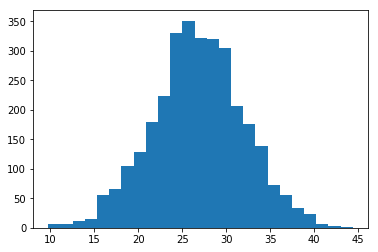

In [0]:
# You can use histograms to explore non-normal data.

# This one is pretty normal:

_ = plt.hist(df['Physical inactivity - % Physically Inactive - 2018'],bins=25)

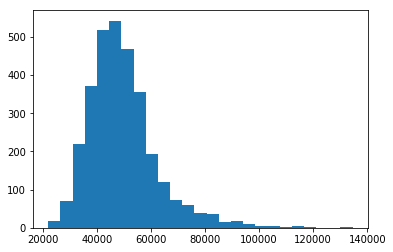

In [0]:
# This one is a little less normal:

# Pull variable out of the DataFrame:
var = 'Median household income - Household Income - 2018'
x = df[var]

# Remove missing values:
x = x.loc[np.isfinite(x)]

# Plot histogram
_ = plt.hist(x,bins=25)

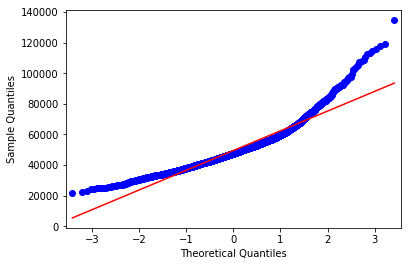

In [0]:
# You can also visualize normality with a qqplot.  Departure of the data from the line indicates non-normality.

qqplot(x.values, line='s')
plt.show()